<a id='A'></a>
# Project: TMDB Movie Dataset (with limitation completed input for every movie!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data Wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#con">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tips**:  After cleaning and wrangling you will face some analysis with 3805 Movie Dataset extracted from aproxemately 11 000 movie the rule was that every Movie has name of (the director, casts, and production_company),and get the data away of 0 budget or 0 revenue with assuming that all currency was us-dollar ($).    

> data has titles or columns ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'] but for my analysis i used only this columns ['popularity', 'budget(US-Dollars)', 'revenue(US-Dollars)',
       'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'vote_count', 'vote_average', 'release_year',
       'profit'] and i added the profit column which  = the revenue - the budget.
       
> to make Dataset readable :<br><br>
        cast - The name of lead and supporting actors.<br>
        budget - The budget in which the movie was made.<br>
        genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
        popularity - A numeric quantity specifying the movie popularity.<br>
        production_companies - The production house of the movie.<br>
        revenue - The worldwide revenue generated by the movie.<br>
        title - Title of the movie.<br>
        vote_average - average ratings the movie recieved.<br>
        vote_count - the count of votes recieved.

<a href="#A">Top NoteBook</a>

<a id='Data Wrangling'></a>
## Data Wrangling <br>
### Data Cleaning
1) Removing the columns that won't be useful in my analysis.

2) Discard 0 budget or 0 revenue movies and assum that main currency is (US-Dollars).

3) clean the empty data.

4) Removing duplicated rows.

5) Convert some data types to be integers (converting floats to integers).

### Extract the dataset from csv file.

In [1]:
#set up import statements numpy, pandas, seaborn,and matplotlib.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#load data from csv file with command pd.read_csv('the file in the same folder or the url of it').
df = pd.read_csv('tmdb-movies.csv')

### determine budget and revenue as assumed the main currency is us dollar $.

In [2]:
#rename the columns to be clear.
df.rename(columns={'budget': 'budget(US-Dollars)', 'revenue': 'revenue(US-Dollars)'}, inplace=True)

### wrangle  0 budget or 0 revenue.

In [3]:
#convert zeros from columns budget and revenue to NAN value to remove it.
money = ['budget(US-Dollars)', 'revenue(US-Dollars)']
df[money] = df[money].replace(0, np.NAN)

### clean the data from all not completed information.

In [4]:
#delete all this columns ['','','',...]. 
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview',
         'budget_adj', 'revenue_adj', 'release_date'], axis=1, inplace=True)

In [5]:
#delete all rows with NAN value.
df.dropna(inplace=True)

In [6]:
#remove this duplicates
df.drop_duplicates(inplace=True)

### wrangle budget and revenue and extract the profit<br>
prifit = revenue - budget

In [7]:
#convert the dataframe['column_name']from its type to be integer.
df['budget(US-Dollars)']=df['budget(US-Dollars)'].astype(int)
df['revenue(US-Dollars)']=df['revenue(US-Dollars)'].astype(int)
#make another column profit and determine it = revenue - budget
df['profit(US-Dollars)'] = df['revenue(US-Dollars)'] - df['budget(US-Dollars)']

### all information after wrangling.

In [8]:
#extract the information from every column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   budget(US-Dollars)    3805 non-null   int32  
 2   revenue(US-Dollars)   3805 non-null   int32  
 3   original_title        3805 non-null   object 
 4   cast                  3805 non-null   object 
 5   director              3805 non-null   object 
 6   runtime               3805 non-null   int64  
 7   genres                3805 non-null   object 
 8   production_companies  3805 non-null   object 
 9   vote_count            3805 non-null   int64  
 10  vote_average          3805 non-null   float64
 11  release_year          3805 non-null   int64  
 12  profit(US-Dollars)    3805 non-null   int32  
dtypes: float64(2), int32(3), int64(3), object(5)
memory usage: 297.3+ KB


### 13 column and 3805 movie

In [9]:
#determine how many columns and rows
df.shape

(3805, 13)

### name of columns .

In [10]:
#extract only name of the columns.
df.columns

Index(['popularity', 'budget(US-Dollars)', 'revenue(US-Dollars)',
       'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'vote_count', 'vote_average', 'release_year',
       'profit(US-Dollars)'],
      dtype='object')

### view of first 5 row in data after wrangling.

In [11]:
# extract first 5 rows.
df.head()

,popularity,budget(US-Dollars),revenue(US-Dollars),original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit(US-Dollars)
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1316249360


<a href="#A">Top NoteBook</a>

<a id='eda'></a>
## More Insights.
## Exploratory Data Analysis

### the question is which genre of movies is more profitable?
### so i combined genres with profit in seperated dataframe to know that 

In [12]:
#genres_df is a new dataframe with all of our df data but in column genres as you see 
#assign>>genres str to assign as string and split every word in the row and explode to make every word in its own row alone. 
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
#genres_profit = genres_df but only with column genres grouped with mean of profit($) to every genres and sort descending.
genres_profit = genres_df.groupby('genres')['profit(US-Dollars)'].mean().sort_values(ascending=False)
genres_profit

genres
Animation          1.819434e+08
Adventure          1.487091e+08
Fantasy            1.463063e+08
Family             1.433311e+08
Science Fiction    1.071376e+08
Action             1.003329e+08
Comedy             6.531357e+07
War                6.377623e+07
Thriller           6.091785e+07
Romance            5.924098e+07
Music              5.917397e+07
Mystery            5.595021e+07
Crime              5.125899e+07
Drama              4.697623e+07
History            4.101761e+07
Horror             3.902479e+07
TV Movie           3.700000e+07
Western            3.457804e+07
Documentary        2.259236e+07
Foreign           -5.402044e+06
Name: profit(US-Dollars), dtype: float64

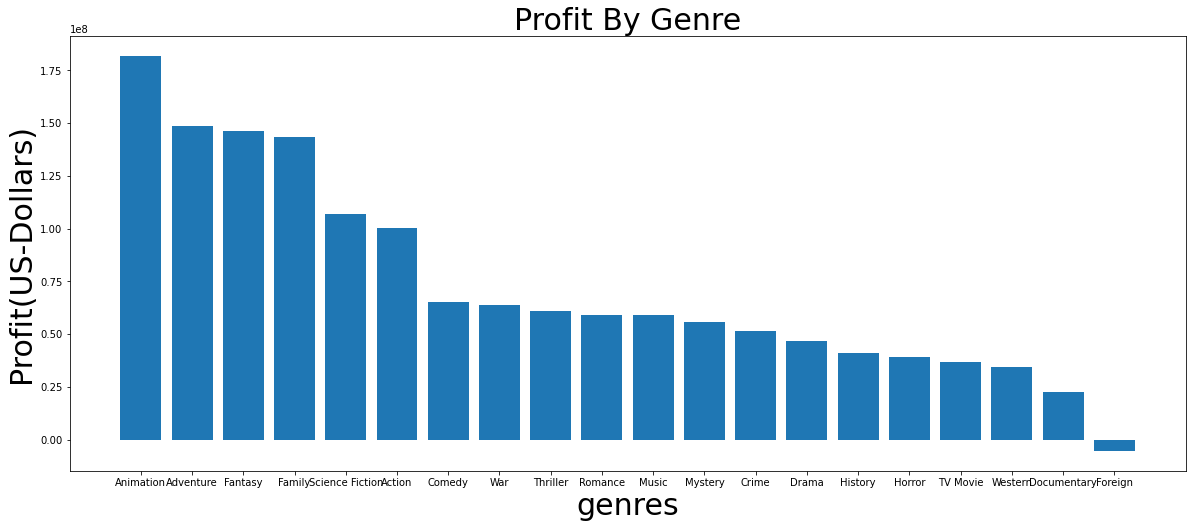

In [13]:
#To visualize our data
plt.subplots(figsize=(20,8))
plt.bar(genres_profit.index, genres_profit)
plt.title('Profit By Genre', fontsize=30)
plt.xlabel('genres',fontsize=30)
plt.ylabel('Profit(US-Dollars)', fontsize=30);

### in the same question above but with revenue to get which genre is more popular ?

In [14]:
#genres_profit = genres_df but only with column genres grouped with mean of profit($) to every genres and sort descending.
genres_revenue = genres_df.groupby('genres')['revenue(US-Dollars)'].mean().sort_values(ascending=False)
genres_revenue

genres
Animation          2.594622e+08
Adventure          2.133391e+08
Family             2.067415e+08
Fantasy            2.062965e+08
Science Fiction    1.550330e+08
Action             1.532163e+08
War                1.060321e+08
Comedy             9.889204e+07
Thriller           9.848113e+07
Mystery            9.108964e+07
Western            8.741292e+07
Romance            8.684626e+07
Music              8.578206e+07
Crime              8.438961e+07
History            8.201769e+07
Drama              7.537430e+07
Horror             5.768960e+07
TV Movie           4.200000e+07
Documentary        2.853075e+07
Foreign            5.917601e+06
Name: revenue(US-Dollars), dtype: float64

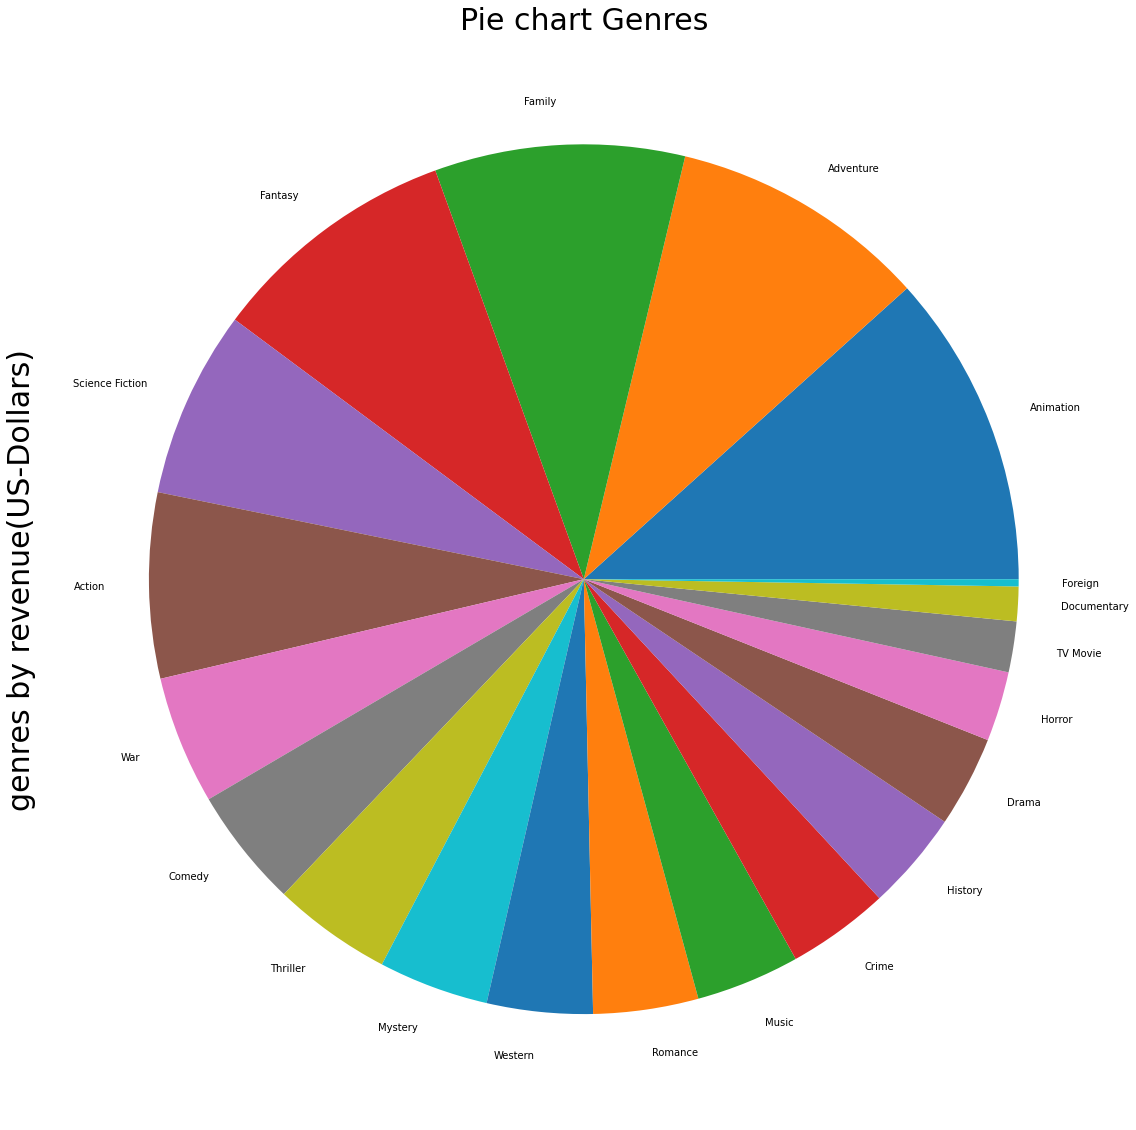

In [15]:
genres_revenue.plot.pie(figsize=(20, 20))
plt.title('Pie chart Genres', fontsize=30)
plt.ylabel('genres by revenue(US-Dollars)', fontsize=30);

### in the same question but with budget to see which genre of movies need a few budget? 

In [16]:
#genres_profit = genres_df but only with column genres grouped with mean of profit($) to every genres and sort descending.
genres_budget = genres_df.groupby('genres')['budget(US-Dollars)'].mean().sort_values()
genres_budget

genres
TV Movie           5.000000e+06
Documentary        5.938390e+06
Foreign            1.131964e+07
Horror             1.866482e+07
Music              2.660809e+07
Romance            2.760528e+07
Drama              2.839807e+07
Crime              3.313061e+07
Comedy             3.357846e+07
Mystery            3.513943e+07
Thriller           3.756327e+07
History            4.100008e+07
War                4.225584e+07
Western            5.283489e+07
Science Fiction    5.620292e+07
Action             5.687500e+07
Family             6.341041e+07
Adventure          7.041056e+07
Fantasy            7.086352e+07
Animation          7.751875e+07
Name: budget(US-Dollars), dtype: float64

### question: how is popularity the same with popularity we know from revenue?

In [17]:
# group exploded dataframe by genres, get average popularity
popularity_ = genres_df.groupby('genres').popularity.mean().sort_values(ascending=False)
popularity_

genres
Adventure          1.880773
Science Fiction    1.879384
Fantasy            1.758474
Animation          1.724374
Action             1.578319
Family             1.482102
Thriller           1.267477
War                1.246129
Mystery            1.145317
Western            1.134246
Crime              1.126850
Comedy             1.025128
Drama              1.013325
History            0.973971
Romance            0.965236
Music              0.923735
Horror             0.857656
Documentary        0.353553
TV Movie           0.273628
Foreign            0.191946
Name: popularity, dtype: float64

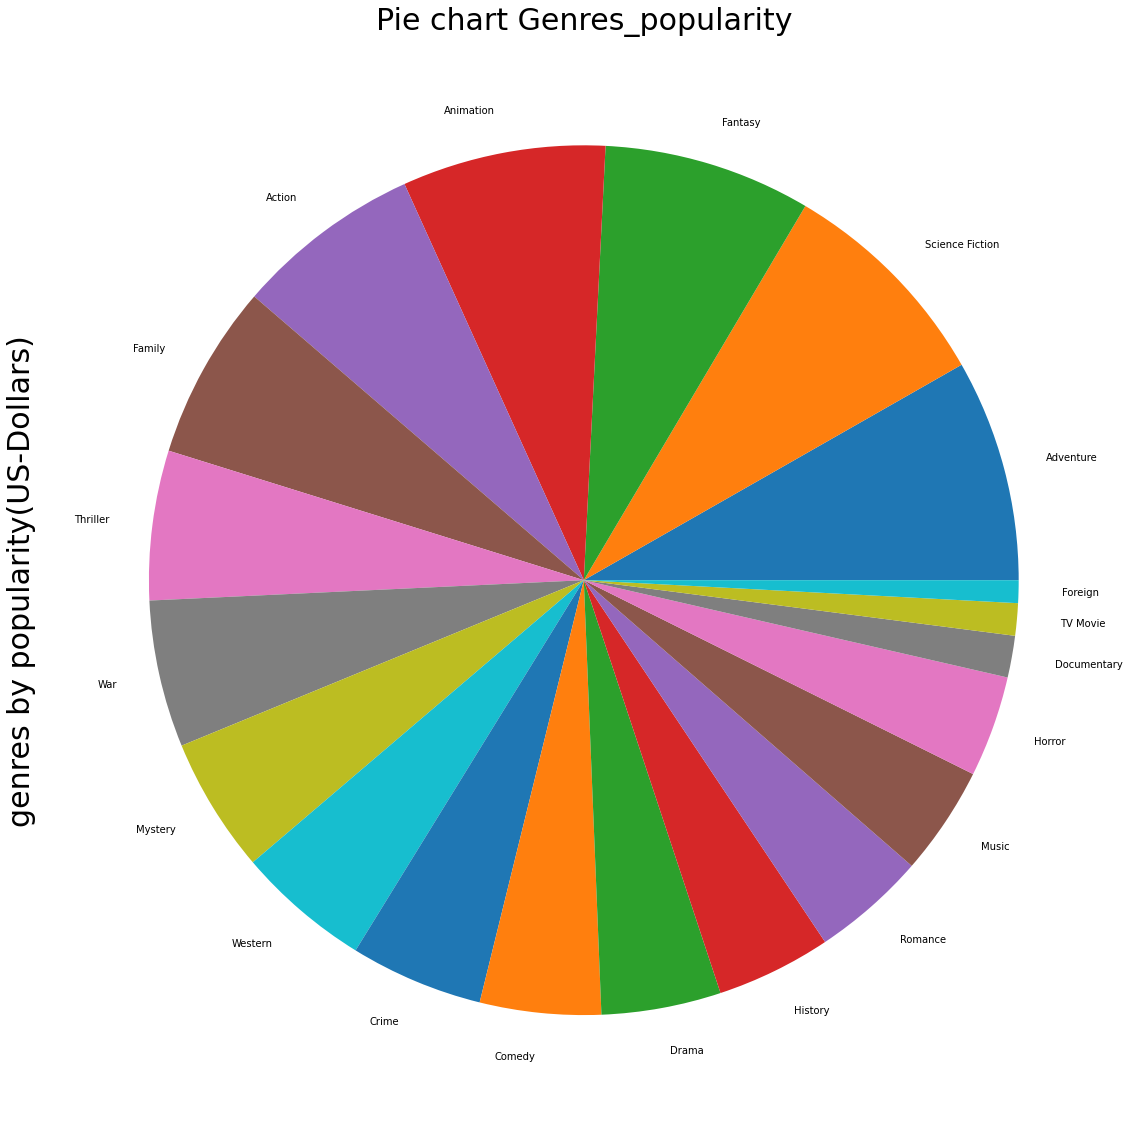

In [18]:
popularity_.plot.pie(figsize=(20, 20))
plt.title('Pie chart Genres_popularity', fontsize=30)
plt.ylabel('genres by popularity(US-Dollars)', fontsize=30);

Text(0.5, 1.0, 'df.histograms')

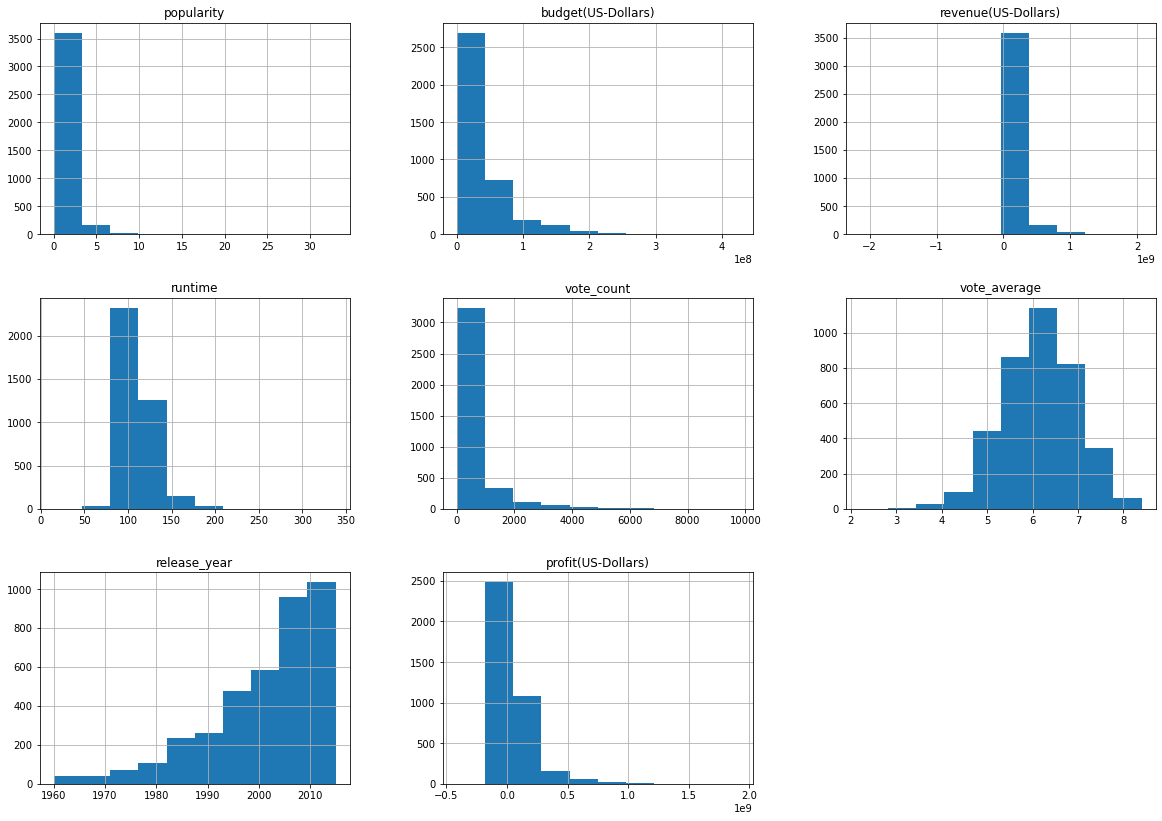

In [19]:
df.hist(figsize=(20,14))
plt.title('df.histograms', fontsize=30)

### question which movie got the top average vote?

In [20]:
#extract max of floats in vote_average.
df[df['vote_average'] == df.vote_average.max()]

,popularity,budget(US-Dollars),revenue(US-Dollars),original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit(US-Dollars)
4178,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994,3341469
7948,0.283191,1200000,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88,Documentary|Music,Talking Heads|Arnold Stiefel Company,23,8.4,1984,3778922


### which movie is less verage votes?

In [21]:
#Foodfight is the loser in average vote.
df[df['vote_average'] == df.vote_average.min()]

,popularity,budget(US-Dollars),revenue(US-Dollars),original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit(US-Dollars)
4859,0.111351,65000000,73706,Foodfight!,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...,Lawrence Kasanoff,87,Animation|Action|Comedy|Family,Threshold Entertainment|Lions Gate Family Ente...,12,2.2,2012,-64926294


### question which movie more popular than others?

In [22]:
#most popular movie is Jurassic World people love to watch it.
df[df['popularity'] == df.popularity.max()]

,popularity,budget(US-Dollars),revenue(US-Dollars),original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit(US-Dollars)
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810


### which movie the most revenue ?

In [23]:
df[df['revenue(US-Dollars)'] == df['revenue(US-Dollars)'].max()]

,popularity,budget(US-Dollars),revenue(US-Dollars),original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit(US-Dollars)
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225


### which actor more profit?

In [24]:
#cast_df is a new dataframe with all of our df data but in column cast as you see 
#assign>>cast str to assign as string and split every word in the row and explode to make every word in its own row alone. 
cast_df = df.assign(cast=df['cast'].str.split('|')).explode('cast')
#cast_profit = cast_df but only with column cast grouped with mean of profit($) to every actor and sort descending.
cast_profit = cast_df.groupby('cast')['profit(US-Dollars)'].mean().sort_values(ascending=False)
cast_profit

cast
Daisy Ridley          1.868178e+09
Nick Robinson         1.363529e+09
Jonathan Groff        1.124219e+09
Idina Menzel          1.124219e+09
Santino Fontana       1.124219e+09
                          ...     
Joan Copeland        -9.999975e+07
Elisabeth Harnois    -1.110072e+08
Emilio EchevarrÃ­a   -1.191800e+08
Ti Lung              -4.139124e+08
Jang Dong-gun        -4.139124e+08
Name: profit(US-Dollars), Length: 6747, dtype: float64

### which actor work more?

In [25]:
cast_df.cast.value_counts()

Robert De Niro         52
Bruce Willis           46
Samuel L. Jackson      44
Nicolas Cage           43
Matt Damon             36
                       ..
Kelli Maroney           1
Joe Cortese             1
Roy Dupuis              1
Vithaya Pansringarm     1
Taylor Kinney           1
Name: cast, Length: 6747, dtype: int64

### animation which more profitable  frequent or not? and every type with its iteration infact to profit?

In [26]:
genres_df.genres.value_counts()

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
Name: genres, dtype: int64

### more frequent movie A Nightmare on Elm Street
### Steven Spielberg more frequent director
### and so on 

In [27]:
df.mode().iloc[0]

popularity                                                       0.187319
budget(US-Dollars)                                             25000000.0
revenue(US-Dollars)                                            12000000.0
original_title                                  A Nightmare on Elm Street
cast                    William Shatner|Leonard Nimoy|DeForest Kelley|...
director                                                 Steven Spielberg
runtime                                                             100.0
genres                                                              Drama
production_companies                                   Paramount Pictures
vote_count                                                           16.0
vote_average                                                          6.5
release_year                                                       2011.0
profit(US-Dollars)                                              1000000.0
Name: 0, dtype: object

In [28]:
np.round(df.corr(), 2)

,popularity,budget(US-Dollars),revenue(US-Dollars),runtime,vote_count,vote_average,release_year,profit(US-Dollars)
popularity,1.00,0.44,0.58,0.21,0.78,0.32,0.18,0.60
budget(US-Dollars),0.44,1.00,0.66,0.26,0.55,0.02,0.27,0.53
revenue(US-Dollars),0.58,0.66,1.00,0.23,0.69,0.22,0.14,0.90
runtime,0.21,0.26,0.23,1.00,0.27,0.36,-0.11,0.22
vote_count,0.78,0.55,0.69,0.27,1.00,0.39,0.21,0.73
vote_average,0.32,0.02,0.22,0.36,0.39,1.00,-0.14,0.26
release_year,0.18,0.27,0.14,-0.11,0.21,-0.14,1.00,0.09
profit(US-Dollars),0.60,0.53,0.90,0.22,0.73,0.26,0.09,1.00


### the best runtime is 124 minutes.

In [29]:
runtime_group_0 = df.groupby(['popularity'])['runtime'].mean()
runtime_group = df.groupby(['popularity'])['runtime'].mean().tail()
runtime_group

popularity
13.112507    119.0
14.311205    121.0
24.949134    169.0
28.419936    120.0
32.985763    124.0
Name: runtime, dtype: float64

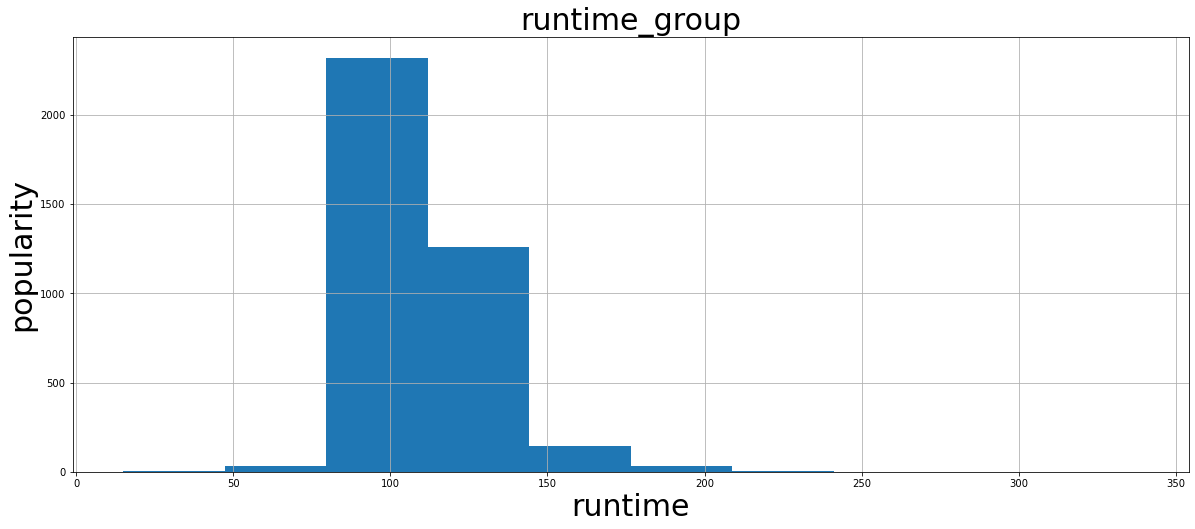

In [30]:
runtime_group_0.hist(figsize=(20,8))
plt.title('runtime_group', fontsize=30)
plt.xlabel('runtime',fontsize=30)
plt.ylabel('popularity', fontsize=30);

### Top rated Stop Making Sense, The Shawshank Redemption, The Godfather, Whiplash

In [31]:
Top_rated = df[df['vote_average'] > 8.1]
Top_rated 

,popularity,budget(US-Dollars),revenue(US-Dollars),original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit(US-Dollars)
650,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2372,8.2,2014,10693093
4178,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994,3341469
7269,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,3970,8.3,1972,239066411
7948,0.283191,1200000,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88,Documentary|Music,Talking Heads|Arnold Stiefel Company,23,8.4,1984,3778922


### Jurassic World, Mad Max: Fury Road, Interstellar Top popular

In [32]:
Top_rated_0 = df[df['popularity'] > 20]
Top_rated_0

,popularity,budget(US-Dollars),revenue(US-Dollars),original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit(US-Dollars)
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014,456752480


<a href="#A">Top NoteBook</a>

<a id='con'></a>
# Conclusions

### limitations:

> We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.

> **conclusion** :as you see the average of animation movies was more profit than others <br>
    Animation, Adventure, Fantasy incourage producers to make business <br>
    Foreign, Documentary, Western not incourage producers to make business

>**conclusion**: the most 5 popular movies types is Animation, Adventure, Family, Fantasy, Science Fiction<br>
    the most 5 not popular movies types is Foreign, Documentary, TV Movie, Horror, Drama

>**conclusion**: comedy movies is a few budget and also not bad choise to get profit.<br>
fewest budget TV Movie

>**Conclusions**: popularity is not the same with popularity from revenue  

>**conclusion**: The Shawshank Redemption and Stop Making Sense with 8.4 average is the most rate

>**conclusion**: Foodfight! with 2.2 average is the fewest rate.

>**conclusion**:  most popular movie is Jurassic World people love to watch it.

>**conclusion**:  most revenue is Star Wars: The Force Awakens people love to watch it.

>**conclusion** which actor more profit? Daisy Ridley

>**conclusion** which actor work more? Robert De Niro

>**conclusion**:  animation which more profitable  frequent or not? and every type with its iteration infact to profit? No

>**conclusion**: more frequent movie A Nightmare on Elm Street<br>
Steven Spielberg more frequent director

>**conclusion**: the best runtime is 124 minutes.

>**conclusion**: Top rated Stop Making Sense, The Shawshank Redemption, The Godfather, Whiplash

>**conclusion**: Jurassic World, Mad Max: Fury Road, Interstellar Top popular

<a href="#A">Top NoteBook</a>